# Actividad I

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dataset/daily-max-temperatures.csv")
df['Temperature'].dropna(axis = 0)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace= True)
df.head(5)

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5


## I - Descripcion de datos

In [3]:
# 1. Daily Temperature Change
df['Daily Change'] = df['Temperature'].diff()

# 2. Rolling Averages (3 and 7 day rolling average)
df['3-Day Rolling Avg'] = df['Temperature'].rolling(window=3).mean()
df['7-Day Rolling Avg'] = df['Temperature'].rolling(window=7).mean()
# 3. Monthly Averages
monthly_avg = df['Temperature'].resample('ME').mean()

# 4. Yearly Trends
yearly_avg = df['Temperature'].resample('YE').mean()

# 5. Anomalies
mean_temp = df['Temperature'].mean()
std_temp = df['Temperature'].std()
df['Anomaly'] = (df['Temperature'] > mean_temp + 1.5 * std_temp) | (df['Temperature'] < mean_temp - 1.5 * std_temp)

# 6. Seasons
seasonal_patterns = df['Temperature'].groupby(df.index.month).mean()

# 7. Temperature Distribution
temperature_distribution = df['Temperature'].describe()


<Axes: ylabel='Frequency'>

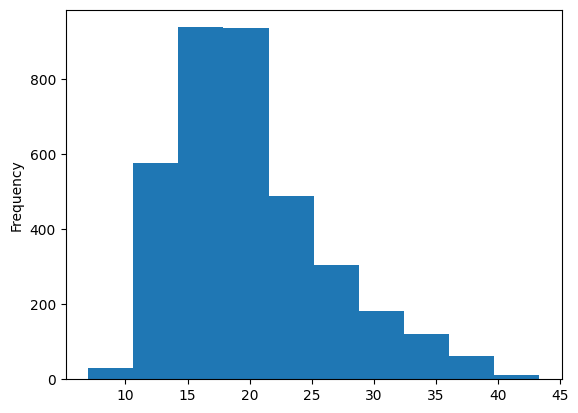

In [4]:
df['Temperature'].plot(kind="hist")

In [5]:
df['Temperature'].median()

np.float64(18.9)

Las temperaturas mas frecuentes se encuentran en el rango de 15-22 grados, la mediana es de 18.9 grados

In [6]:
temperature_distribution

count    3650.000000
mean       20.009151
std         6.108353
min         7.000000
25%        15.400000
50%        18.900000
75%        23.000000
max        43.300000
Name: Temperature, dtype: float64

En promedio la temperatura diaria es de 20 grados

## plots

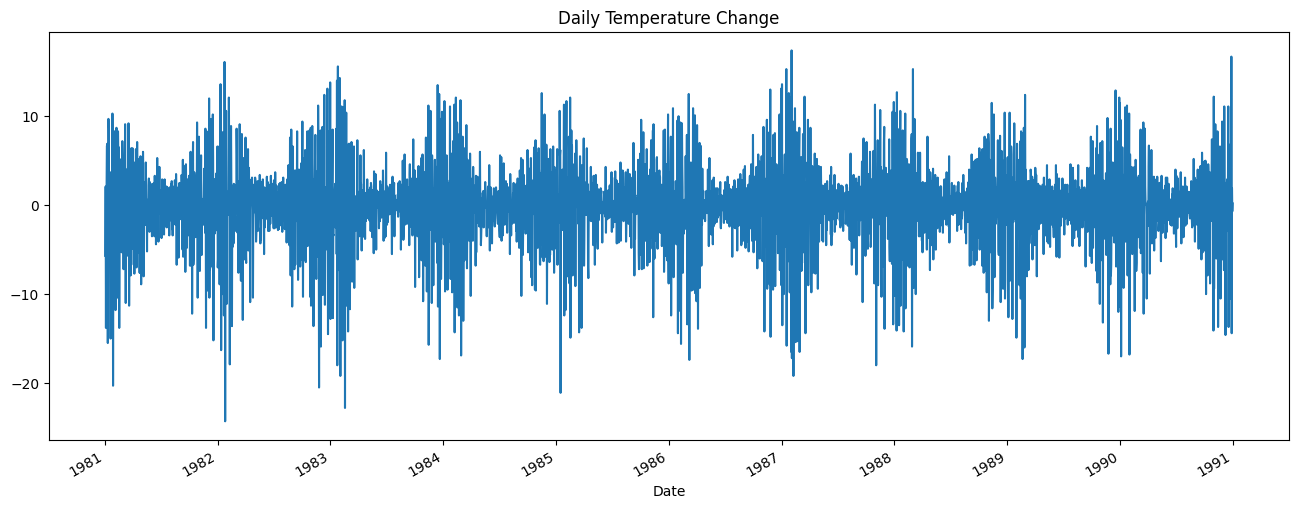

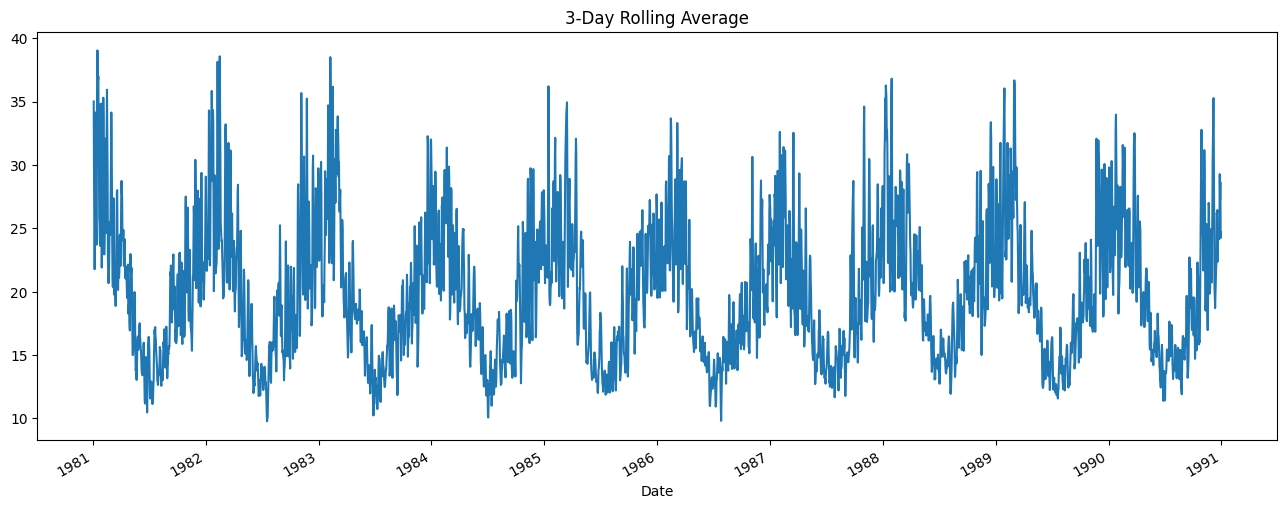

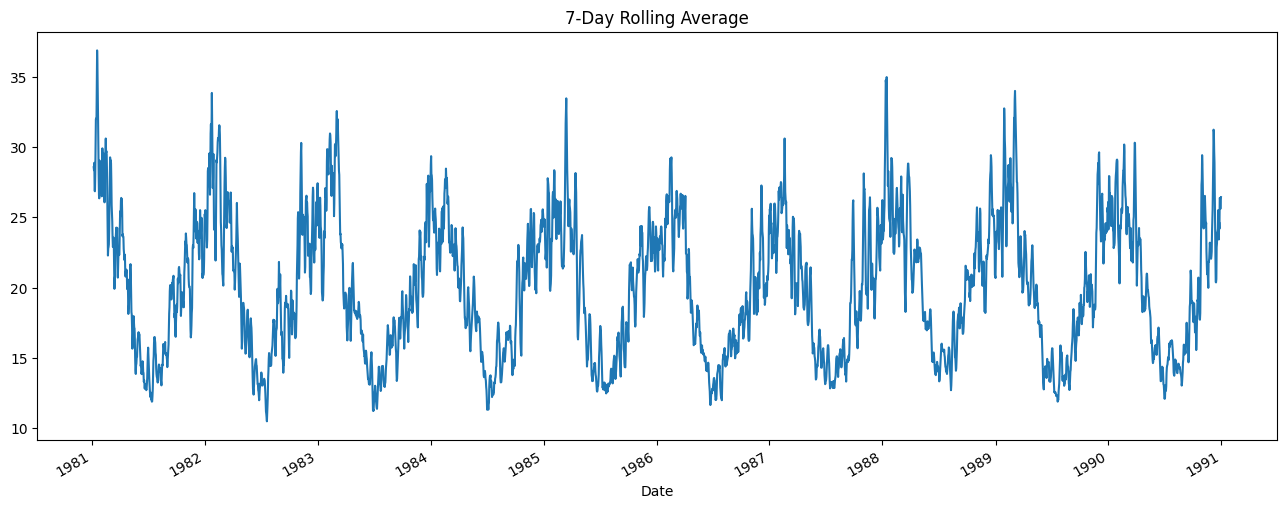

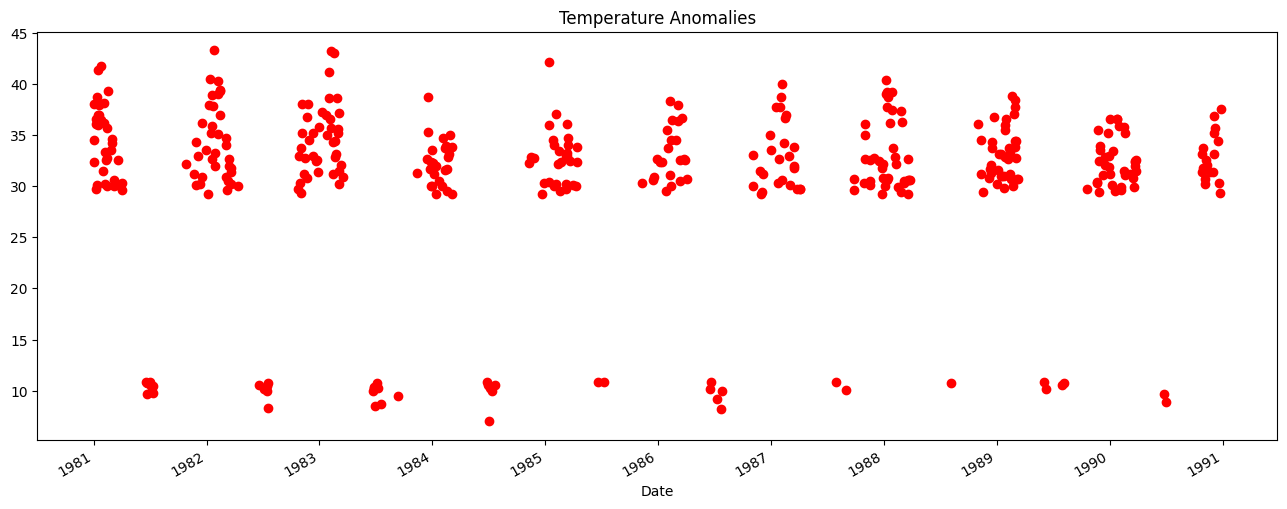

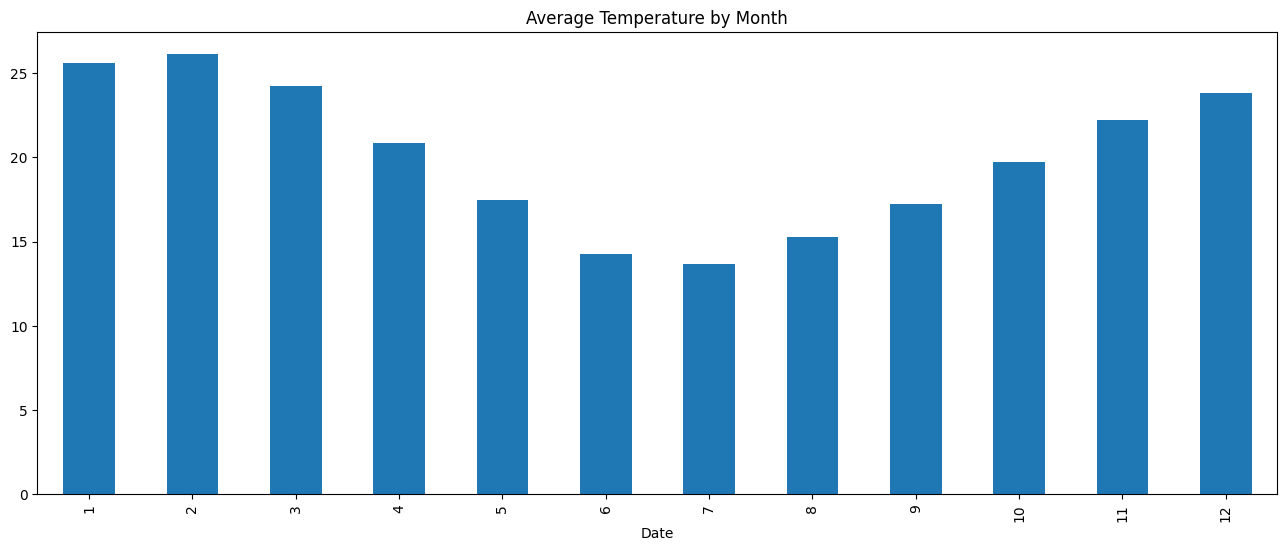

In [7]:
# Plot Daily Temperature Change
df['Daily Change'].plot(title='Daily Temperature Change', figsize=(16,6))
plt.show()

# Plot 3-Day Rolling Average
df['3-Day Rolling Avg'].plot(title='3-Day Rolling Average', figsize=(16,6))
plt.show()

# Plot 7-Day Rolling Average
df['7-Day Rolling Avg'].plot(title='7-Day Rolling Average', figsize=(16,6))
plt.show()

# Plot Anomalies
df[df['Anomaly']]['Temperature'].plot(title='Temperature Anomalies',marker = "o", linestyle='None', color='r', figsize=(16,6))
plt.show()

# Plot Seasonal Patterns
seasonal_patterns.plot(kind='bar', title='Average Temperature by Month', figsize=(16,6))
plt.show()

### Diferenciacion

In [8]:
df['d1b']=df['Temperature'].diff()
df.head(5)

,Temperature,Daily Change,3-Day Rolling Avg,7-Day Rolling Avg,Anomaly,d1b
Date,,,,,,
1981-01-01,38.1,NaN,NaN,NaN,True,NaN
1981-01-02,32.4,-5.7,NaN,NaN,True,-5.7
1981-01-03,34.5,2.1,35.000000,NaN,True,2.1
1981-01-04,20.7,-13.8,29.200000,NaN,False,-13.8
1981-01-05,21.5,0.8,25.566667,NaN,False,0.8


<Axes: title={'center': 'Diferenciación de primer orden'}, xlabel='Date'>

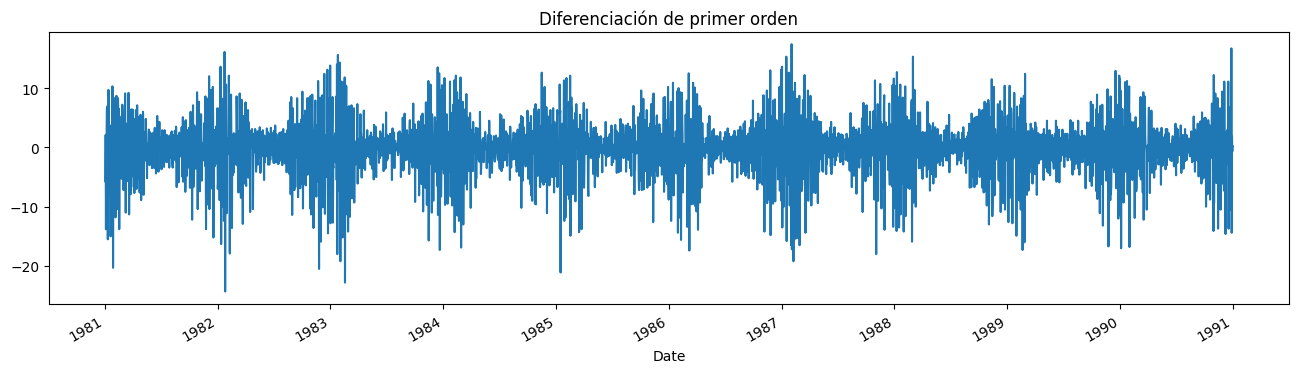

In [9]:
df["d1b"].plot(title="Diferenciación de primer orden",figsize = (16,4))

In [10]:
df['d2b']=df['d1b'].diff()
df.head(5)

,Temperature,Daily Change,3-Day Rolling Avg,7-Day Rolling Avg,Anomaly,d1b,d2b
Date,,,,,,,
1981-01-01,38.1,NaN,NaN,NaN,True,NaN,NaN
1981-01-02,32.4,-5.7,NaN,NaN,True,-5.7,NaN
1981-01-03,34.5,2.1,35.000000,NaN,True,2.1,7.8
1981-01-04,20.7,-13.8,29.200000,NaN,False,-13.8,-15.9
1981-01-05,21.5,0.8,25.566667,NaN,False,0.8,14.6


<Axes: title={'center': 'Diferenciación de segundo orden'}, xlabel='Date'>

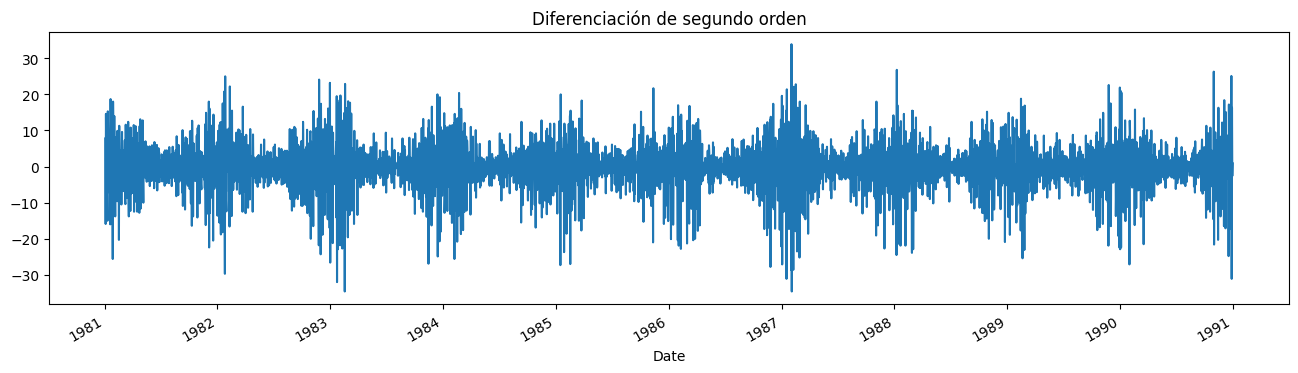

In [11]:
df["d2b"].plot(title="Diferenciación de segundo orden",figsize = (16,4))

# ETS aditivo

In [12]:
df

,Temperature,Daily Change,3-Day Rolling Avg,7-Day Rolling Avg,Anomaly,d1b,d2b
Date,,,,,,,
1981-01-01,38.1,NaN,NaN,NaN,True,NaN,NaN
1981-01-02,32.4,-5.7,NaN,NaN,True,-5.7,NaN
1981-01-03,34.5,2.1,35.000000,NaN,True,2.1,7.8
1981-01-04,20.7,-13.8,29.200000,NaN,False,-13.8,-15.9
1981-01-05,21.5,0.8,25.566667,NaN,False,0.8,14.6
...,...,...,...,...,...,...,...
1990-12-27,37.6,16.7,29.266667,26.385714,True,16.7,25.1
1990-12-28,23.2,-14.4,27.233333,26.342857,False,-14.4,-31.1
1990-12-29,25.1,1.9,28.633333,25.600000,False,1.9,16.3


In [13]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [19]:
df.isna().sum()

Temperature          2
Daily Change         3
3-Day Rolling Avg    4
7-Day Rolling Avg    8
Anomaly              2
d1b                  3
d2b                  4
dtype: int64

In [29]:
df.dropna(axis = 0,inplace=True)

In [34]:
df = df.asfreq('D')
df.dropna(axis = 0,inplace=True)

In [35]:
#df = df.asfreq('D')

# Decompose the time series
result = seasonal_decompose(df['Temperature'], model='additive', )

# Plotting the decomposition
result.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

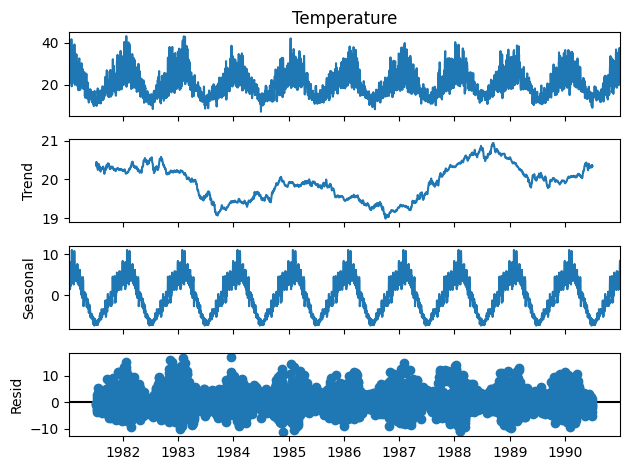

In [39]:
result = seasonal_decompose(df['Temperature'],model = 'aditive',period = 365)
result.plot();

# Hodrick-Prescott

In [17]:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
temp_cycle, temp_trend = hpfilter(df['Temperature'],lamb=1e5)

<Axes: title={'center': 'Temperature and HP Filter Trend'}, xlabel='Date'>

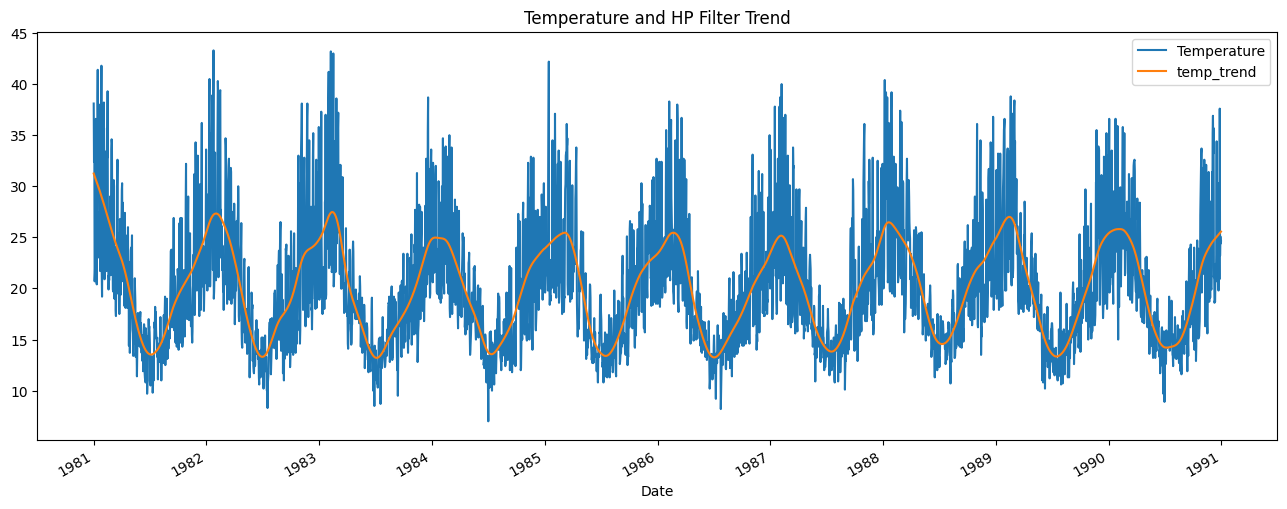

In [ ]:
df["temp_trend"] = temp_trend
df[['Temperature', 'temp_trend']].plot(title='Temperature and HP Filter Trend',figsize=(16,6))

# Suavizado exponencial de 1ero, 2ndo y tercer orden. Calcular las funciones ACF y PACF